<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 3: Neural Networks, Perceptrons and Hyperparameters</center></h1>
<hr>
<b>Lab date:</b> <i>Thursday, October 17, 2019 -- 2:00 - 4:50 PM</i>
<br>
<b>Room:</b> <i>ETLC E5-013<i/>
<br>
<b>Lab report due:</b> <i>Wednesday, October 30, 2019 -- 3:50 PM</i>
<hr>

<h2> 1. Objective:  </h2>

The objective of this lab is to gain familiarity with the concepts of linear models and to gain a feeling for how changing hyperparameters affects the performance of the model. The exercises in the lab will help bring to light the weaknesses and strengths of linear models and how to work with them.

<h2> 2. Expectation: </h2> 

Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label all the axies and provide a legend when appropriate.  An abstract, introduction, and conclusion are required as well, for which cells are provided at the end of the notebook.  The abstract should be a brief description of the topic, the introduction a description of the goals of the lab, and the conclusion a summary of what you learned, what you found difficult, and your own ideas and observations.

<h2> 3. Pre lab: </h2>

1. Read through the code. What kind of models will be used in this lab?
2. Explain why the differentiability of an activation function plays an important role in the learning of these neural networks.  Why might the linear activation function be a poor choice in some cases?

<h2> 4. Introduction: </h2>

During this lab, you will be performing a mix of 2 common machine learning tasks: regression and classification. Before defining these tasks mathematically, it is important to understand the core process behind the two tasks. Regression is defined as reasoning backwards. In the context of machine learning, regression is about predicting the future based on the past. Classification is defined as the act of arranging things based on their properties. These definitions give insight into how these problems are broken down.

Suppose you, a human being, want to make a prediction. What are the steps that you take:
You first collect data on the subject that you want to predict. Then you weigh the relevance of each piece of information that you get, attributing varying levels of importance to each piece of data. Once you have enough relevant data, you become certain of an outcome. Finally, you act on that certainty. This pipeline is shown in the figure below:


![alt text](Prediction_flowchart_v3.png "Prediction Pipeline")

Now the classification task, one usually begins this with a topic that they want to classify. This is usually accompanied by a list of candidate categories, one of which is the correct category for the topic in question. Since classification relies on properties of the topic, the next step is to list the notable features that may help in the discerning the correct category. Similarly to the prediction, the relevance of each piece of information is then weighed and a decision is made when you have enough data. Once this is done, the guess is compared to reality in order to judge if the classification was correct. This pipeline is shown in the figure below:    


![alt text](Prediction_flowchart_v3.png "Classification Pipeline")



The mathematical model that we will use in this lab to describe such behaviors are called linear models. The simplest linear model is the perceptron.

A *perceptron* is a simple type of neural network that uses *supervised learning*, where the expected values, or *targets*, are provided to the network in addition to the inputs.   The network operates by first calculating the weighted sum of its inputs (and bias).  These weights are typically randomly assigned.  Then, the sum is processed with an *activation function* that "squashes" the summed total to a smaller range, such as (0, 1).  

The perceptron's way of reasoning is formulated in the same way as a human's. It takes in input data in the form of the x vector. It then weighs the relevance of each input using the mathematical operation of multiplication. Following this, the total sum of all weighted inputs is passed through an activation function, analogous to the moment that you have enough  data to confirm an outcome. Then they output a value, y, that is effectively the action that you take based on your prediction.

The math behind the perceptron's operations is described by the following formulae:
<br>
$$
tot = \sum_{t=1}^{n} {x_i w_i} + \theta =  \sum_{t=0}^{n} {x_i w_i}
$$

$$
o = f_{act}(tot)
$$
<br> 
Training a perceptron involves calculating the error by taking the difference between the targets and the actual outputs.  This allows it to determine how to update its weights such that a closer output value to the target is obtained.
<br>
Perceptrons are commonly employed to solve two-class classification problems where the classes are linearly separable.  However, the applications for this are evidently very limited.  Therefore, a more practical extension of the perceptron is the *multi-layer perceptron*, which adds extra hidden layer(s) between the inputs and outputs to yield more flexibility in what the MLP can classify.
<br>
The most common learning algorithm used is *backpropagation (BP)*.  It employs gradient descent in an attempt to minimize the squared error between the network outputs and the targets.
<br>
$$
E = \frac{1}{2} \sum_{k=1}^{n}\sum_{i=1}^{q}[t_{i}(k) - o_{i}(k)]^2
$$
<br>
This error value is propagated backwards through the network, and small changes are made to the weights in each layer.  Using a gradient descent approach, the weights in the network are updated as follows:
<br>
$$
\Delta w^{(l)} = - \eta \nabla w^{(l)} = - \eta \frac{\partial E(k)}{\partial w^{(l)}}
$$
<br>
where $\eta > 0$ is the *learning rate*.  The network is trained using the same data, multiple times in *epochs*.  Typically, this continues until the network has reached a convergence point that is defined by the user through a *tolerance* value.  For the case of this lab, the tolerance value is ignored and training will continue until the specified number of epochs is reached.  More details of backpropagation can be found in the lecture notes.


Neural networks have two types of parameters that affect the performance of the network, parameters and hyperparameters. Parameters have to do with the characteristics that the model learns during the training process. Hyperparameters are values that are set before training begins. The parameters of linear models are the weights. The hyperparameters include: 
- Learning algorithm 
- Loss function 
- Learning rate 
- Activation function


Hyperparameter selection is very important in the field of AI in general. The performance of the learning systems that are deployed relies hevily on the selection of hyperparameters and some advances in the field have even been soley due to changes in hyperparametes. More on hyperparameters can be found in the lecture notes and in the literature.

<br>
<h2> 5. Experimental Procedure:</h2>


### Exercise 1: Perceptrons and their limitations 

The objective of this exercise is to show how adding depth to the network makes it learn better. This exercise will involve running the following cells and examining the data. This exercise will showcase the classification task and it will be performed on the Iris dataset. Also, ensure that all files within "Lab 3 Resources" is placed in the same directory as this Jupyter notebook.
<br>
Run the following cell to import all the required libraries.



In [2]:
%matplotlib inline

import numpy as np                               # General math operations
import scipy.io as sio                           # Loads .mat variables
import matplotlib.pyplot as plt                  # Data visualization
from sklearn.linear_model import Perceptron      # Perceptron toolbox
from sklearn.neural_network import MLPRegressor  # MLP toolbox
import seaborn as sns 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing
from sklearn import linear_model                # Linear models
from sklearn.tree import DecisionTreeRegressor 

import warnings
warnings.filterwarnings('ignore')

The Iris dataset: This dataset contains data points on three different species of Iris, a type of flower. The dataset has 50 entries for each of the species and has 4 different features: 
<ol>
<li>Sepal Length</li>
<li>Sepal Width</li>
<li>Petal Length</li> 
<li>Petal Width</li>
</ol>

This dataset has one obvious class that is separate from a cluster of the other two classes, making it a typical exercise in classification for machine learning. The next cell loads the dataset into 2 variables, one for the features and one for the classes. 

In [3]:
# load the data
iris = datasets.load_iris()
Y = iris.target
X = iris.data

# set up the pandas dataframes 
X_df = pd.DataFrame(X, columns = ['Sepal length','Sepal width', 'Petal length', 'Petal width'] )
Y_df = pd.DataFrame(Y, columns = ['Iris class'])

# this code changes the class labels from numerical values to strings
Y_df = Y_df.replace({
0:'Setosa',
1:'Virginica',
2:'Versicolor'
})

#Joins the two dataframes into a single data frame for ease of use
Z_df = X_df.join(Y_df)



Visualizing the data is a important tool for data exploration. Visualizing the data will allow you to intuitively understand obvious relationships that are present in the data, even before you begin to analyse it. The next cell will plot all of the features against each other. 

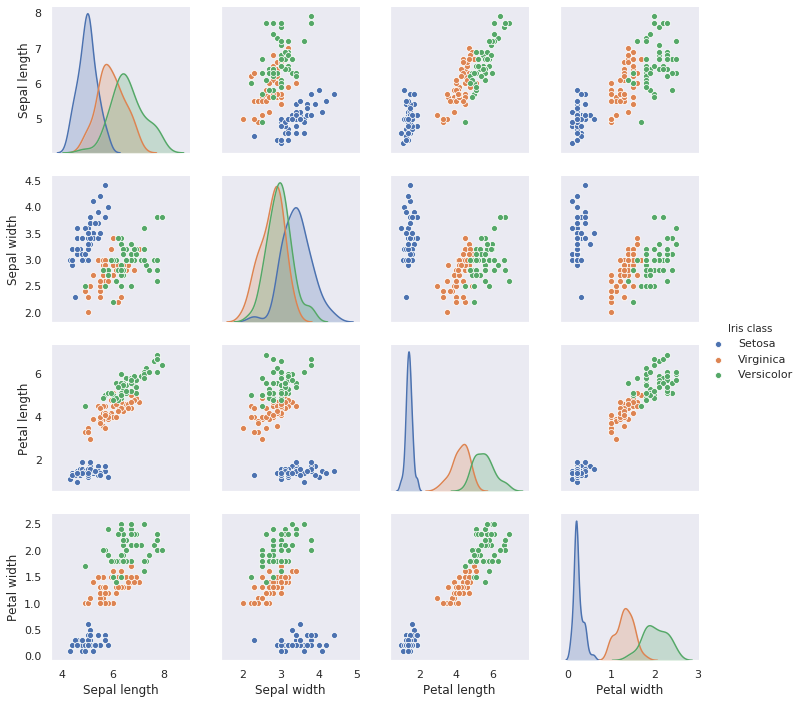

In [4]:
# show the data using seaborn 
sns.set(style='dark', palette= 'deep')
pair = sns.pairplot(Z_df, hue = 'Iris class')
plt.show()

This type of plot is called a pairplot. It plots each feature against all other features including itself; this is done for all four features. This results in 2 different types of plots being present in the plot, scatter and histogram. 

The following cell will train a perceptron on the features and labels and display the result on the test set in a pairplot. 

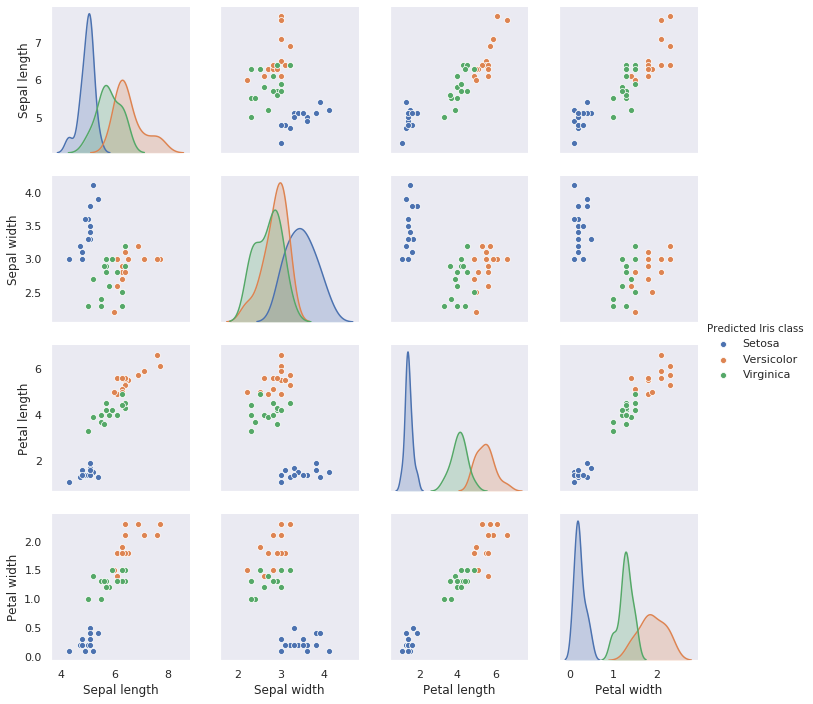

In [5]:
RANDOM_SEED = 6
xTrain, xTest, yTrain, yTest = train_test_split(X_df, Y_df, test_size =0.3,\
                                               random_state=RANDOM_SEED)
#plot the testing data 
test_df = xTest.join(yTest)
# print(test_df.head)
# perceptron training
percep = Perceptron(max_iter = 1000)
percep.fit(xTrain, yTrain)
prediction = percep.predict(xTest)

# print(prediction)
# display the classifiers performance  
prediction_df = pd.DataFrame(prediction, columns=['Predicted Iris class'], index = test_df.index)
# print(prediction_df.head)

prediction_df_index_df = prediction_df.join(xTest)
# print(prediction_df_index_df.head)

pair = sns.pairplot(prediction_df_index_df, hue = 'Predicted Iris class')
#pair_test = sns.pairplot(test_df, hue ='Iris class')
plt.show()

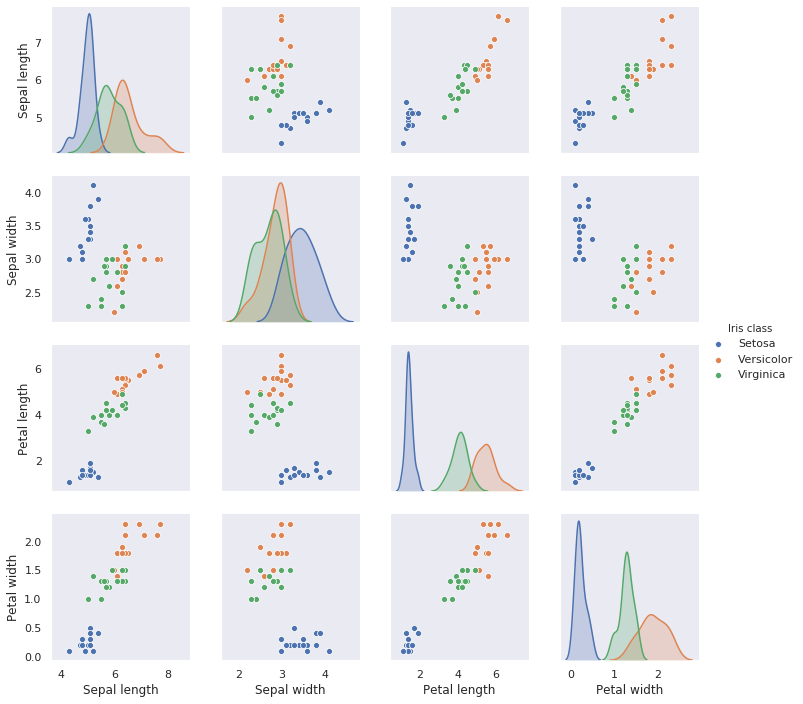

In [6]:
pair_test = sns.pairplot(test_df, hue ='Iris class') #test data from the dataset 

### Question 1: 
**Comment on the performance of the perceptron, how well does it handle the task?**

The next cell will retrain the perceptron but with different parameters. This MLP consists of 2 hidden layers: one with 8 neurons and a second one with 3 



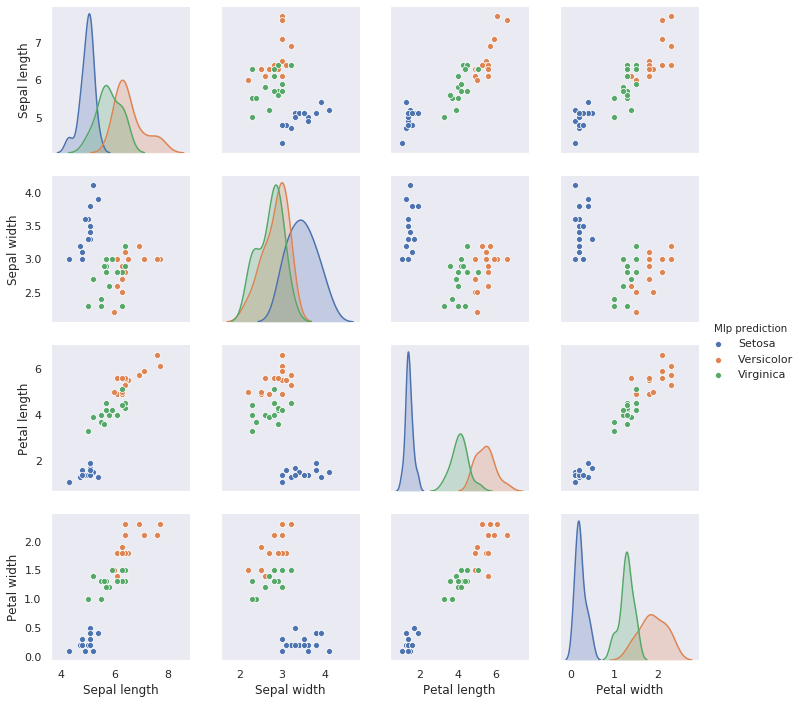

In [59]:
# change the layers, retrain the mlp 
cls = MLPClassifier(solver = 'sgd' ,activation = 'relu' ,  \
                    hidden_layer_sizes = (8,3,), max_iter = 100000)

for i in range(0,5):
    cls.fit(xTrain, yTrain)

mlp_z = cls.predict(xTest)

mlp_z.reshape(-1,1)


cls_df = pd.DataFrame(mlp_z, columns = ["Mlp prediction"], index=xTest.index)

# cls_df_index = cls_df.join(Test_index_df).set_index('Test index')
# cls_df_index.index.name = None 

# Join with the test_index frame 
cls_prediction_df = cls_df.join(xTest)
# Display the MLP classifier
cls_pairplot = sns.pairplot(cls_prediction_df, hue = 'Mlp prediction')

### Question 2:
Answer the following questions:

- **How does the Mlp compare to the perceptron in the classification task?** 
- **Did it do well**
- **Was it able to classify the three classes?** 
- **What happens when you run it again?**
- **Can you offer a explanation for what happened?**

<br></br>

Fill the box below with your answer:

### Exercise 2: Getting your hands dirty with regression

**NOTE: The code in this exercise is computationally intensive and may require up to 5 minutes to finish running.**

In order to improve the energy management of monitoring stations, a team of climatologists would like to implement a more robust strategy of predicting the solar energy available for the next day, based on the current day's atmospheric pressure.  They plan to test this with a station situated in Moxee, and are designing a multi-layer perceptron that will be trained with the previous year's worth of Moxee data.  They have access to the following values:
<ul>
    <li><b>Inputs:</b> Pressure values for each hour, along with the absolute differences between them</li>
    <li><b>Targets:</b> Recorded solar energy for the day after</li>
</ul>

<br>
The individual who was in charge of this project before had created a traditional machine learning approach to predict the solar energy availiabilty of the next day. The individual recently retired and you have been brought on to the team to try to implement a more accurate system. You find some code that was left over that uses a MLP. The MLP is initially formed using one hidden layer of 50 neurons, a logistic sigmoid activation function, and a total of 500 iterations.  Once it is trained, the MLP is used to predict the results of both the training cases and new test cases.  As a measure of accuracy, the root mean square error (RMSE) is displayed after inputting data to the MLP.

First, read through the code to understand what results it produces, and then run the script. 

### Question 1:
<ol>
    Your objective is to play with the parameters of the regressor to see if you can beat the decision tree. There are parameters that you can change to try to beat it. You can change:
<ul>
    <li>Size of the Hidden Layers: <b>between 1 and 50</b>  </li>
    <li> Activation Function:</li>
    <ul><li><b>Identity</b> </li>
        <li><b>Logistic</b> </li>
        <li><b>tanh</b> </li>
        <li><b>relu</b> </li>
        </ul>
    <li>Number of Iterations, to different values (both lower and higher): <b>Between 1 and 1000</b></li>

</ul>
<br>
Comment on how this affects the results. Include plots of your final results (using any one of your values for the parameters). Describe some of the tradeoffs associated with both lowering and raising the number of iterations.</li>


In order to determine the accuracy of the methods, you will be using RMSE 

$$
RMSE = \sqrt{\frac{\sum{(Approximated - observed)}}{n}}
$$ 

</ol>

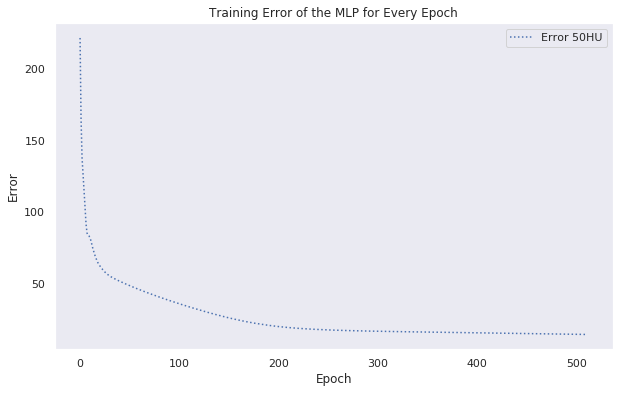

Training RMSE: 2.483260169720097 MJ/m^2
Test RMSE: 3.019782486160804 MJ/m^2
Decision Tree training RMSE: 0.18092649714730089 MJ/m^2
Decision Tree Test RMSE: 4.145256318483627 MJ/m^2


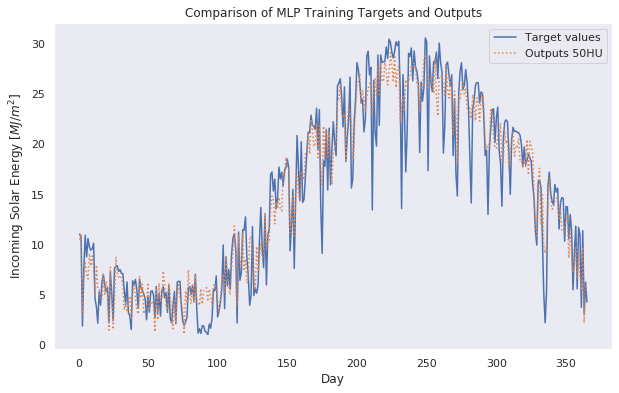

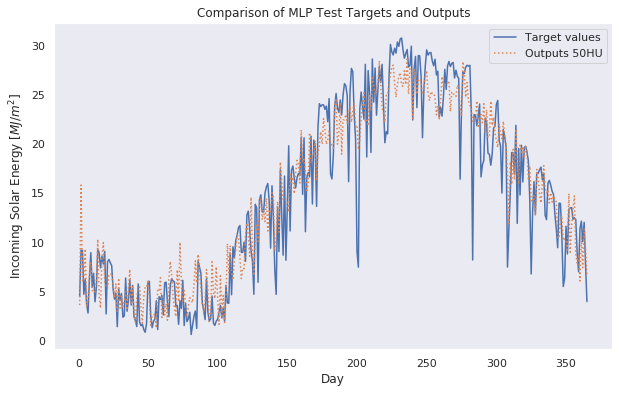

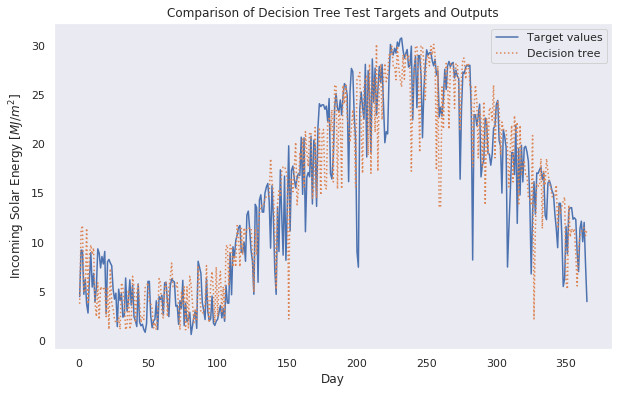

In [60]:
# Obtain training data
moxeeData = sio.loadmat('moxeetrainingdata.mat')    # Load variables from the Moxee dataset
trainingInputs = moxeeData['pressureData']          # Pressure values and differences for every hour in a year
trainingTargets = moxeeData['dataEstimate']         # Estimate of incoming solar energy based on observed data

# Preprocess the training inputs and targets
iScaler = preprocessing.StandardScaler()    # Scaler that removes the mean and scales to unit variance
scaledTrainingInputs = iScaler.fit_transform(trainingInputs)   # Fit and scale the training inputs

tScaler = preprocessing.StandardScaler()
scaledTrainingTargets = tScaler.fit_transform(trainingTargets)

# Create the multilayer perceptron.
# This is where you will be modifying the regressor to try to beat the decision tree
mlp = MLPRegressor(
    hidden_layer_sizes = (25,),     # One hidden layer with 50 neurons
    activation = 'logistic',        # Logistic sigmoid activation function
    solver = 'sgd',                 # Gradient descent
    learning_rate_init = 0.01 ,# Initial learning rate
    )
# 
############################################################### Create the decision tree:
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth = 10) 
dt_reg.fit(scaledTrainingInputs, scaledTrainingTargets)


### MODIFY THE VALUE BELOW ###
noIterations = 512  # Number of iterations (epochs) for which the MLP trains
### MODIFY THE VALUE ABOVE ###

trainingError = np.zeros(noIterations)  # Initialize array to hold training error values

# Train the MLP for the specified number of iterations
for i in range(noIterations):
    mlp.partial_fit(scaledTrainingInputs, np.ravel(scaledTrainingTargets))  # Partial fit is used to obtain the output values after each epoch
    currentOutputs = mlp.predict(scaledTrainingInputs)  # Obtain the outputs for the current MLP using the training inputs
    trainingError[i] = np.sum((scaledTrainingTargets.T - currentOutputs) ** 2) / 2  # Keep track of the error throughout the number of epochs

# Plot the error curve
plt.figure(figsize=(10,6))
ErrorHandle ,= plt.plot(range(noIterations), trainingError, label = 'Error 50HU',  linestyle = 'dotted')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error of the MLP for Every Epoch')
plt.legend(handles = [ErrorHandle])
plt.show()

# Obtain test data
testdataset = sio.loadmat('moxeetestdata.mat')
testInputs = testdataset['testInputs']
testTargets = testdataset['testTargets']
scaledTestInputs = iScaler.transform(testInputs)  # Scale the test inputs

# Predict incoming solar energy from the training data and the test cases
scaledTrainingOutputs = mlp.predict(scaledTrainingInputs)
scaledTestOutputs = mlp.predict(scaledTestInputs)

#################################################################### Predict using the bad guy: 
scaledTreeTrainingOutputs = dt_reg.predict(scaledTrainingInputs)
scaledTreeTestOutputs = dt_reg.predict(scaledTestInputs)

# Transform the outputs back to the original values
trainingOutputs = tScaler.inverse_transform(scaledTrainingOutputs)
testOutputs = tScaler.inverse_transform(scaledTestOutputs)
## DT outputs 
treeTrainingOutputs = tScaler.inverse_transform(scaledTreeTrainingOutputs) # -- transform the tree back to real data 
treeTestingOutputs = tScaler.inverse_transform(scaledTreeTestOutputs)

# Calculate and display training and test root mean square error (RMSE)
trainingRMSE = np.sqrt(np.sum((trainingOutputs - trainingTargets[:, 0]) ** 2) / len(trainingOutputs)) / 1000000  # Divide by 1e6 for MJ/m^2
testRMSE = np.sqrt(np.sum((testOutputs - testTargets[:, 0]) ** 2) / len(testOutputs)) / 1000000

## need to add this for the decision tree 
trainingTreeRMSE = np.sqrt(np.sum((treeTrainingOutputs - trainingTargets[:, 0]) ** 2) / len(trainingOutputs)) / 1000000
testTreeRMSE = np.sqrt(np.sum((treeTestingOutputs - testTargets[:, 0]) ** 2) / len(testOutputs)) / 1000000

print("Training RMSE:", trainingRMSE, "MJ/m^2")
print("Test RMSE:", testRMSE, "MJ/m^2")
##################################################################### Print the tree RMSE:
print("Decision Tree training RMSE:", trainingTreeRMSE, 'MJ/m^2')
print("Decision Tree Test RMSE:", testTreeRMSE, 'MJ/m^2')
day = np.array(range(1, len(testTargets) + 1))

# Plot training targets vs. training outputs
plt.figure(figsize=(10,6))
trainingTargetHandle ,= plt.plot(day, trainingTargets / 1000000, label = 'Target values')
trainingOutputHandle ,= plt.plot(day, trainingOutputs / 1000000, label = 'Outputs 50HU',  linestyle = 'dotted')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of MLP Training Targets and Outputs')
plt.legend(handles = [trainingTargetHandle, trainingOutputHandle])
plt.show()

# Plot test targets vs. test outputs -- student 
plt.figure(figsize=(10,6))
testTargetHandle ,= plt.plot(day, testTargets / 1000000, label = 'Target values')
testOutputHandle ,= plt.plot(day, testOutputs / 1000000, label = 'Outputs 50HU',  linestyle = 'dotted')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of MLP Test Targets and Outputs')
plt.legend(handles = [testTargetHandle, testOutputHandle])
plt.show()

###################################################################### Plot the tree regressor vs. test outputs
plt.figure(figsize=(10,6))
testTreeTargetHandle, = plt.plot(day, testTargets / 1000000, label = 'Target values')
testTreeOutputHandle, = plt.plot(day, treeTestingOutputs / 1000000, label = 'Decision tree', linestyle = 'dotted')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of Decision Tree Test Targets and Outputs')
plt.legend(handles = [testTreeTargetHandle, testTreeOutputHandle])
plt.show()

<br></br>

Fill the box below with your answer for question 1:

Repeat the same process but against this SVM:


During a coffee break, you get talking to one of your friends from a different department. He mentioned that at one point there was an intern that was also tasked with predicting the solar energy and they tried a Support Vector machine. 

When you tell your superiors, they suggest that you try to beat this interns work as well since it seems to work better than the Decision tree that your predecessor left. 

### Question 2 
  Your objective again is to play with the parameters of the regressor to see if you can beat the Support Vector Machine. There are parameters that you can change to try to beat it. You can change:
<ul>
    <li>Size of the Hidden Layers: <b>between 1 and 50</b>  </li>
    <li> Activation Function:</li>
    <ul><li><b> Identity </b> </li>
        <li><b>Logistic</b> </li>
        <li><b>tanh</b> </li>
        <li><b>relu</b> </li>
        </ul>
    <li> Number of Iterations, to different values (both lower and higher): <b>Between 1 and 1000</b></li>

</ul>
<br>
Comment on how this affects the results. Include plots of your final results (using any one of your values for the parameters). Describe some of the tradeoffs associated with both lowering and raising the number of iterations.</li>


In order to determine the accuracy of the methods, you will be using the RMSE again. 

$$
RMSE = \sqrt{\frac{\sum{(Approximated - observed)}}{n}}
$$ 

</ol>

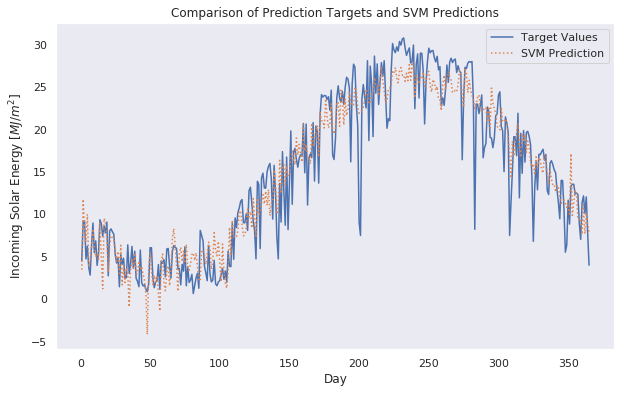

Support Vector Machine RMSE values and Plots
Training RMSE: 2.972561039988286 MJ/m^2
Test RMSE: 3.011292709980872 MJ/m^2


In [9]:
#INITIALIZE 
from sklearn.svm import LinearSVR
svm_clf = LinearSVR(C=0.6, loss='squared_epsilon_insensitive')
svm_clf.fit(scaledTrainingInputs, np.ravel(scaledTrainingTargets)) 

# PREDICT the training outputs and the test outputs
scaledTrainingOutputs = svm_clf.predict(scaledTrainingInputs)
scaledTestOutputs = svm_clf.predict(scaledTestInputs)


trainingOutputs = tScaler.inverse_transform(scaledTrainingOutputs)
testOutputs = tScaler.inverse_transform(scaledTestOutputs)

 #Calculate and display training and test root mean square error (RMSE)
trainingsvmRMSE = np.sqrt(np.sum((trainingOutputs - trainingTargets[:, 0]) ** 2) / len(trainingOutputs)) / 1000000  # Divide by 1e6 for MJ/m^2
testsvmRMSE = np.sqrt(np.sum((testOutputs - testTargets[:, 0]) ** 2) / len(testOutputs)) / 1000000

#### PLOTTING
plt.rcParams["figure.figsize"] = (10,6)
day = np.array(range(1, len(testTargets) + 1))

testTargetHandle, = plt.plot(day, testTargets / 1000000, label = 'Target Values')
testsvmOutputHandle, = plt.plot(day, testOutputs / 1000000, label = 'SVM Prediction', linestyle = 'dotted')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of Prediction Targets and SVM Predictions')
plt.legend(handles = [testTargetHandle, testsvmOutputHandle])
plt.show()

print("Support Vector Machine RMSE values and Plots")
print("Training RMSE:", trainingsvmRMSE, "MJ/m^2")
print("Test RMSE:", testsvmRMSE, "MJ/m^2")

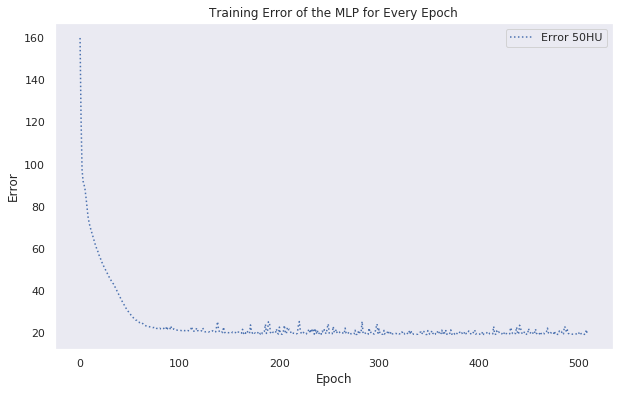

MLP Training and test RMSE values:
Training RMSE:  2.888201285511587
Test RMSE:  2.9497269135303323


In [57]:
# Modify this neural network 
mlp = MLPRegressor(
    hidden_layer_sizes = (1,),     # One hidden layer with 50 neurons
    activation = 'relu',        # Logistic sigmoid activation function
    solver = 'sgd',                 # Gradient descent
    learning_rate_init = 0.01 ,# Initial learning rate
    )
# 
############################################################### Create the decision tree:
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth = 10) 
dt_reg.fit(scaledTrainingInputs, scaledTrainingTargets)


### MODIFY THE VALUE BELOW ###
noIterations = 510  # Number of iterations (epochs) for which the MLP trains
### MODIFY THE VALUE ABOVE ###

trainingError = np.zeros(noIterations)  # Initialize array to hold training error values

# Train the MLP for the specified number of iterations
for i in range(noIterations):
    mlp.partial_fit(scaledTrainingInputs, np.ravel(scaledTrainingTargets))  # Partial fit is used to obtain the output values after each epoch
    currentOutputs = mlp.predict(scaledTrainingInputs)  # Obtain the outputs for the current MLP using the training inputs
    trainingError[i] = np.sum((scaledTrainingTargets.T - currentOutputs) ** 2) / 2  # Keep track of the error throughout the number of epochs
    
# Predict 
scaledTrainingOutputs = mlp.predict(scaledTrainingInputs)
scaledTestOutputs = mlp.predict(scaledTestInputs)
#Training output conversion    
trainingOutputs = tScaler.inverse_transform(scaledTrainingOutputs)
testOutputs = tScaler.inverse_transform(scaledTestOutputs)

#RMSE calculation 
trainingRMSE = np.sqrt(np.sum((trainingOutputs - trainingTargets[:, 0]) ** 2) / len(trainingOutputs)) / 1000000  # Divide by 1e6 for MJ/m^2
testRMSE = np.sqrt(np.sum((testOutputs - testTargets[:, 0]) ** 2) / len(testOutputs)) / 1000000
    
# Plot the error curve
plt.figure(figsize=(10,6))
ErrorHandle ,= plt.plot(range(noIterations), trainingError, label = 'Error 50HU',  linestyle = 'dotted')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error of the MLP for Every Epoch')
plt.legend(handles = [ErrorHandle])
plt.show()

print("MLP Training and test RMSE values:")
print("Training RMSE: " , trainingRMSE)
print("Test RMSE: " , testRMSE)

<br></br>

Fill the box below with your answer for question 2:

<hr>
<hr>

<h2>Abstract</h2>

<h2>Introduction</h2>

<h2>Conclusion</h2>

<center>
<h3>Lab 3 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}           & \textbf{Total Marks} & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                 & 3                     &               \\ 
                  & Abstract                & 1                     &               \\ 
                  & Introduction            & 1                     &               \\
                  & Conclusion              & 2                     &               \\
1                 & Classification      	& 20                    &               \\
2                 & Regression              & 20                 	                \\
\hline
                  & \textbf{TOTAL}          & 47                    &
\end{array}